This notebook is based upon the work of Peter Grenholm (https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99), originally used on the MNIST Digit Recognition set. It was an attempt to replicate his 99% recognition rate with the MNIST Sign Language dataset. Though his model - from as far as I could tell - was never shown a completely unseen set of data

While I was able to replicate the recognition rate with the training set, the model did not work as well with unseen data, with a top accuracy score of .62%. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.style as style
style.use('fivethirtyeight')

import keras
from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [3]:
df_test.shape

(7172, 785)

In [4]:
df_train.head()
df_train.shape

(27455, 785)

In [5]:
labels = df_train['label'].values

In [6]:
df_train.drop('label', axis=1, inplace=True)

In [7]:
images = df_train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

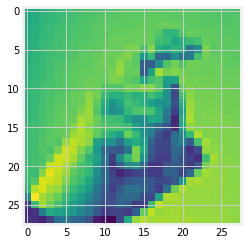

In [8]:
plt.imshow(images[25].reshape(28, 28))

In [9]:
label_bin = LabelBinarizer()
labels = label_bin.fit_transform(labels)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

Text(0.5, 1.0, '28x28 data')

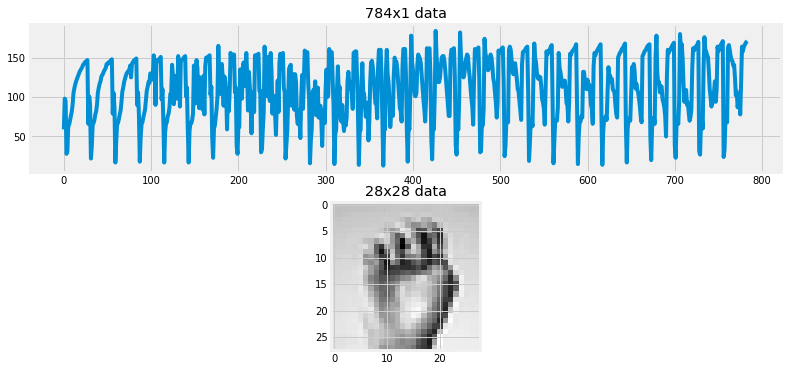

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[20].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')


In [12]:
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

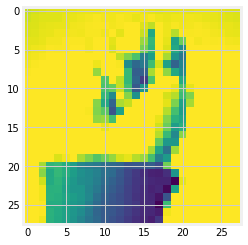

In [15]:
plt.imshow(x_train[25].reshape(28,28))

In [16]:
# x_train = x_train.astype("float32")/255.
# x_test = x_test.astype("float32")/255.

In [17]:
x_train.shape, x_test.shape

((19218, 28, 28, 1), (8237, 28, 28, 1))

In [18]:
y_train.shape, y_test.shape

((19218, 24), (8237, 24))

In [19]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

W0729 17:46:25.539259 140117130286848 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 17:46:25.559015 140117130286848 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 17:46:25.581037 140117130286848 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 17:46:25.615382 140117130286848 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics=["accuracy"])

W0729 17:46:30.960789 140117130286848 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
__________

In [24]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, 
                           verbose=2,  
                           validation_data=(x_test, y_test))

W0729 17:46:34.548334 140117130286848 deprecation.py:323] From /home/matthew/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 - 16s - loss: 1.8761 - acc: 0.4300 - val_loss: 0.4944 - val_acc: 0.8274
Epoch 2/20
 - 14s - loss: 0.9299 - acc: 0.6969 - val_loss: 0.2338 - val_acc: 0.9184
Epoch 3/20
 - 15s - loss: 0.6157 - acc: 0.7908 - val_loss: 0.0988 - val_acc: 0.9655
Epoch 4/20
 - 14s - loss: 0.5204 - acc: 0.8240 - val_loss: 0.4371 - val_acc: 0.8493
Epoch 5/20
 - 15s - loss: 0.4247 - acc: 0.8581 - val_loss: 0.0566 - val_acc: 0.9818
Epoch 6/20
 - 16s - loss: 0.3867 - acc: 0.8769 - val_loss: 0.3178 - val_acc: 0.8853
Epoch 7/20
 - 19s - loss: 0.3178 - acc: 0.8996 - val_loss: 0.0364 - val_acc: 0.9891
Epoch 8/20
 - 15s - loss: 0.3361 - acc: 0.8946 - val_loss: 0.0588 - val_acc: 0.9818
Epoch 9/20
 - 15s - loss: 0.2967 - acc: 0.9090 - val_loss: 0.1249 - val_acc: 0.9547
Epoch 10/20
 - 14s - loss: 0.2877 - acc: 0.9128 - val_loss: 0.0197 - val_acc: 0.9934
Epoch 11/20
 - 14s - loss: 0.2488 - acc: 0.9259 - val_loss: 0.0378 - val_acc: 0.9851
Epoch 12/20
 - 15s - loss: 0.2189 - acc: 0.9319 - val_loss: 0.0884 - val_a

In [25]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0058, final accuracy: 0.9979


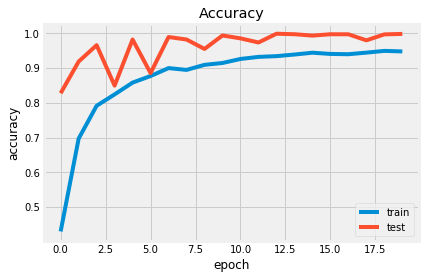

In [26]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [27]:
test_labels = df_test['label']

In [28]:
df_test.drop('label', axis=1, inplace=True)

In [29]:
test_imgs = df_test.values
test_imgs = np.array([np.reshape(i, (28, 28)) for i in test_imgs])
test_imgs = np.array([i.flatten() for i in test_imgs])

In [30]:
test_labels = label_bin.fit_transform(test_labels)

In [31]:
test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)

In [32]:
test_imgs.shape

(7172, 28, 28, 1)

In [33]:
y_hat = model.predict(test_imgs)

In [34]:
loss,acc = model.evaluate(test_imgs, y_hat)
print("Model unseen data, accuracy: {:5.2f}%".format(100*acc))

7172/7172 [==============================] - 2s 331us/step
Model unseen data, accuracy: 100.00%


In [37]:
accuracy_score(test_labels, y_hat.round())

0.6215839375348577